In [1]:
library("phyloseq")
library("ggplot2")      # graphics
library("readxl")       # necessary to import the data from Excel file
library("dplyr")        # filter and reformat data frames
library("tibble")
library("xlsx")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
sampledata<-read.table('map.txt',header=T,sep=",")

In [3]:
otumat<-read.table('ASV_table.csv',sep=",",check.names=FALSE,row.names=1,header=T)
otumat<-t(otumat)

In [4]:
taxmat<-read.table('taxonomy.csv',sep=",",check.names=FALSE,row.names=1,header=T)

In [5]:
otumat<-as.matrix(otumat)
taxmat<-as.matrix(taxmat)
sampledata<-as.matrix(sampledata)

In [6]:
OTU = otu_table(otumat, taxa_are_rows = TRUE)

In [7]:
TAX = tax_table(taxmat)

In [8]:
sampledata=sample_data(data.frame(sampledata,row.names=sampledata[,1]))

In [9]:
head(TAX)
head(otumat)

,Kingdom,Phylum,Class,Order,Family,Genus,Species
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCCGGTAGTCC,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,NA,NA
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCCTGTAGTCC,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,NA
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCCGGTAGTCC,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,NA,NA
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGCCAGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATTTGGAACTGGCAGACTTGAGTGCAGGAGAGGAAGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCAGTGGCGAAGGCGGCCTTCTGGACTGACACTGACGCTGAGGCGCGAAAGCGTGGGTAGCAAACAGGATTAGAAACCCCGGTAGTCC,Bacteria,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Zymobacter,NA
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGCCAGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATTTGGAACTGGCAGACTTGAGTGCAGGAGAGGAAGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCAGTGGCGAAGGCGGCCTTCTGGACTGACACTGACGCTGAGGCGCGAAAGCGTGGGTAGCAAACAGGATTAGAAACCCCTGTAGTCC,Bacteria,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Zymobacter,NA
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGCCAGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATTTGGAACTGGCAGACTTGAGTGCAGGAGAGGAAGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCAGTGGCGAAGGCGGCCTTCTGGACTGACACTGACGCTGAGGCGCGAAAGCGTGGGTAGCAAACAGGATTAGATACCCCGGTAGTCC,Bacteria,Proteobacteria,Gammaproteobacteria,Oceanospirillales,Halomonadaceae,Zymobacter,NA


,1A-D-S,1A-En-S-2,1A-Ex-S-2,1B-En-S-2,1B-Ex-S-2,2A-En-S-2,2A-Ex-S-2,2B-D-S,2B-En-S-2,2B-Ex-S-2,⋯,3B-En-S-2,3B-Ex-S-2,4A-Ex-S-2,4B-En-S-2,4B-Ex-S-2,5A-Ex-S-2,5B-Ex-S-2,AAB23-1-D-W,AAB25-3-D-W,AAB26-4-D-W
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCCGGTAGTCC,968,0,130,0,389,0,308,182,0,0,⋯,0,0,226,0,151,159,0,0,0,0
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGAAACCCCTGTAGTCC,1109,0,234,0,365,0,103,178,0,0,⋯,0,118,64,0,91,0,0,0,0,0
TACAGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGCGCGCGTAGGTGGTTTGTTAAGTTGGATGTGAAAGCCCCGGGCTCAACCTGGGAACTGCATCCAAAACTGGCAAGCTAGAGTACGGTAGAGGGTGGTGGAATTTCCTGTGTAGCGGTGAAATGCGTAGATATAGGAAGGAACACCAGTGGCGAAGGCGACCACCTGGACTGATACTGACACTGAGGTGCGAAAGCGTGGGGAGCAAACAGGATTAGATACCCCGGTAGTCC,904,0,143,0,338,0,0,158,0,0,⋯,0,372,66,0,102,0,0,0,0,0
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGCCAGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATTTGGAACTGGCAGACTTGAGTGCAGGAGAGGAAGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCAGTGGCGAAGGCGGCCTTCTGGACTGACACTGACGCTGAGGCGCGAAAGCGTGGGTAGCAAACAGGATTAGAAACCCCGGTAGTCC,214,0,73,0,64,0,0,248,0,0,⋯,0,114,0,0,87,1130,56,0,0,0
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGCCAGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATTTGGAACTGGCAGACTTGAGTGCAGGAGAGGAAGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCAGTGGCGAAGGCGGCCTTCTGGACTGACACTGACGCTGAGGCGCGAAAGCGTGGGTAGCAAACAGGATTAGAAACCCCTGTAGTCC,202,0,117,0,0,0,0,266,0,0,⋯,0,96,0,0,0,1094,68,0,0,0
TACGGAGGGTGCAAGCGTTAATCGGAATTACTGGGCGTAAAGGGCGCGTAGGCGGTCTGTTAAGCCAGATGTGAAAGCCCCGGGCTTAACCTGGGAACGGCATTTGGAACTGGCAGACTTGAGTGCAGGAGAGGAAGGTAGAATTCCAGGTGTAGCGGTGAAATGCGTAGAGATCTGGAGGAATACCAGTGGCGAAGGCGGCCTTCTGGACTGACACTGACGCTGAGGCGCGAAAGCGTGGGTAGCAAACAGGATTAGATACCCCGGTAGTCC,187,0,152,0,0,0,0,282,0,0,⋯,0,100,0,0,0,1056,127,0,0,0


In [94]:
physeq = phyloseq(OTU, TAX,sampledata)

ntaxa(physeq)
physeq <- subset_taxa(physeq, (Kingdom=="Bacteria"))
ntaxa(physeq)
physeq <- subset_taxa(physeq, (Order!="Chloroplast") | is.na(Order))
physeq <- subset_taxa(physeq, (Family!="Mitochondria") | is.na(Order))
physeq <- subset_taxa(physeq, (Family!="Staphylococcaceae") | is.na(Order))

ntaxa(physeq)


[1] 2933

[1] 2917

[1] 2500

In [95]:
ps<-physeq
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2500 taxa and 22 samples ]
sample_data() Sample Data:       [ 22 samples by 2 sample variables ]
tax_table()   Taxonomy Table:    [ 2500 taxa by 7 taxonomic ranks ]

In [96]:
sample_sums(ps)

1A-D-S   1A-En-S-2   1A-Ex-S-2   1B-En-S-2   1B-Ex-S-2   2A-En-S-2 
      23006        7019       17301        8710       21005        3287 
  2A-Ex-S-2      2B-D-S   2B-En-S-2   2B-Ex-S-2      3A-D-S   3A-Ex-S-2 
      12225       18061        5542       16825       17047       18905 
  3B-En-S-2   3B-Ex-S-2   4A-Ex-S-2   4B-En-S-2   4B-Ex-S-2   5A-Ex-S-2 
       4499       15529       12512        6348       14456       24327 
  5B-Ex-S-2 AAB23-1-D-W AAB25-3-D-W AAB26-4-D-W 
      17901        9318       11336       17212

In [97]:
sample_sums(ps)

1A-D-S   1A-En-S-2   1A-Ex-S-2   1B-En-S-2   1B-Ex-S-2   2A-En-S-2 
      23006        7019       17301        8710       21005        3287 
  2A-Ex-S-2      2B-D-S   2B-En-S-2   2B-Ex-S-2      3A-D-S   3A-Ex-S-2 
      12225       18061        5542       16825       17047       18905 
  3B-En-S-2   3B-Ex-S-2   4A-Ex-S-2   4B-En-S-2   4B-Ex-S-2   5A-Ex-S-2 
       4499       15529       12512        6348       14456       24327 
  5B-Ex-S-2 AAB23-1-D-W AAB25-3-D-W AAB26-4-D-W 
      17901        9318       11336       17212

In [108]:
ps1 = subset_samples(ps, sample_names(ps) != 'AAB23-1-D-W')
ps1 = subset_samples(ps1, sample_names(ps1) != 'AAB25-3-D-W')
ps1 = subset_samples(ps1, sample_names(ps1) != 'AAB26-4-D-W')
ps1 = subset_samples(ps1, sample_names(ps1) != '3A-D-S')

sample_sums(ps1)
ps1r = rarefy_even_depth(ps1)
GP.ord <- ordinate(ps1r, "NMDS", "bray")
pdf('NMDS_DUST.pdf')
p<- plot_ordination(ps1r, GP.ord, type="samples", color="Source", title="Sites")
p + theme_bw() + theme(text = element_text(size = 16)) + geom_point(size = 4)
dev.off()

1A-D-S 1A-En-S-2 1A-Ex-S-2 1B-En-S-2 1B-Ex-S-2 2A-En-S-2 2A-Ex-S-2    2B-D-S 
    23006      7019     17301      8710     21005      3287     12225     18061 
2B-En-S-2 2B-Ex-S-2 3A-Ex-S-2 3B-En-S-2 3B-Ex-S-2 4A-Ex-S-2 4B-En-S-2 4B-Ex-S-2 
     5542     16825     18905      4499     15529     12512      6348     14456 
5A-Ex-S-2 5B-Ex-S-2 
    24327     17901

You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


...

446OTUs were removed because they are no longer 
present in any sample after random subsampling


...



Square root transformation
Wisconsin double standardization
Run 0 stress 0.1793847 
Run 1 stress 0.1793847 
... New best solution
... Procrustes: rmse 0.0001408809  max resid 0.000392913 
... Similar to previous best
Run 2 stress 0.1846648 
Run 3 stress 0.1788507 
... New best solution
... Procrustes: rmse 0.1138834  max resid 0.3905924 
Run 4 stress 0.1821056 
Run 5 stress 0.1775548 
... New best solution
... Procrustes: rmse 0.162296  max resid 0.532519 
Run 6 stress 0.1793066 
Run 7 stress 0.1799233 
Run 8 stress 0.1799577 
Run 9 stress 0.1760596 
... New best solution
... Procrustes: rmse 0.1525747  max resid 0.3863024 
Run 10 stress 0.1775563 
Run 11 stress 0.1821076 
Run 12 stress 0.1788507 
Run 13 stress 0.1879898 
Run 14 stress 0.1821075 
Run 15 stress 0.1959671 
Run 16 stress 0.1775548 
Run 17 stress 0.1813179 
Run 18 stress 0.1775563 
Run 19 stress 0.1794951 
Run 20 stress 0.1793847 
*** No convergence -- monoMDS stopping criteria:
    20: stress ratio > sratmax


Warning message in postMDS(out$points, dis, plot = max(0, plot - 1), ...):
“skipping half-change scaling: too few points below threshold”


png 
  2

In [99]:
#physeq_dust <- subset_samples(ps1, Source=="Dust")

ps1t= transform_sample_counts(ps1, function(x) x / sum(x) )

In [106]:
ps1tr = filter_taxa(ps1t, function(x) sum(x) < 0.05, TRUE)

In [109]:
rmtaxa = taxa_names(ps1tr)
alltaxa = taxa_names(ps1t)
myTaxa = alltaxa[!alltaxa %in% rmtaxa]
ps2 <- prune_taxa(myTaxa,ps1t)
pdf("Dust.pdf")
plot_bar(ps2, "Family", fill="Family", facet_grid=~Source)
dev.off()
# plot_bar(ps2, "Month", fill="Family")


Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


png 
  2

In [34]:
ps1t= transform_sample_counts(ps1, function(x) x / sum(x) )

In [31]:
ps1tr = filter_taxa(ps1t, function(x) sum(x) < 0.05, TRUE)

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


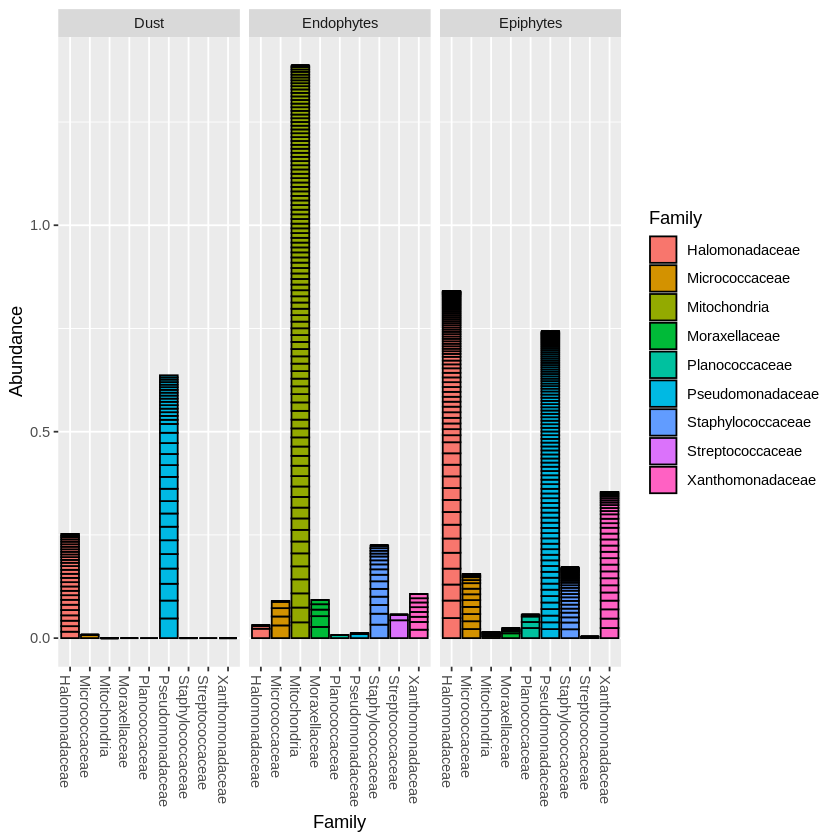

In [32]:
rmtaxa = taxa_names(ps1tr)
alltaxa = taxa_names(ps1t)
myTaxa = alltaxa[!alltaxa %in% rmtaxa]
ps2 <- prune_taxa(myTaxa,ps1t)
#pdf('taxa.pdf')
plot_bar(ps2, "Family", fill="Family", facet_grid=~Source)
#dev.off()

In [16]:
ps1t= transform_sample_counts(ps1, function(x) x / sum(x) )

In [76]:
ps1tr = filter_taxa(ps1t, function(x) sum(x) < .05, TRUE)

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


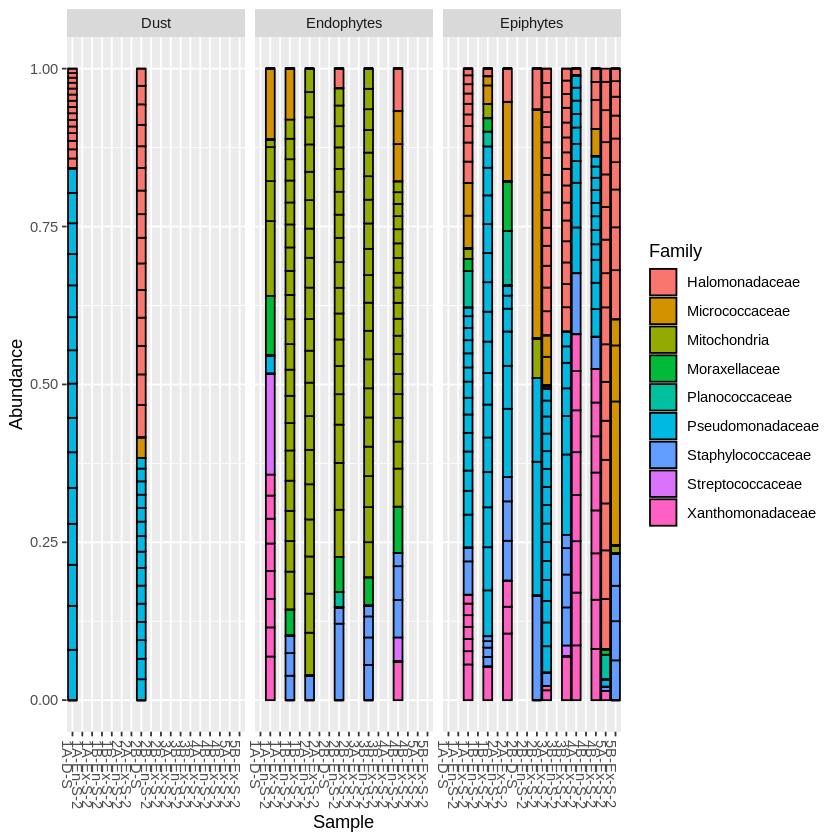

In [77]:
rmtaxa = taxa_names(ps1tr)
alltaxa = taxa_names(ps1)
myTaxa = alltaxa[!alltaxa %in% rmtaxa]

ps2 <- prune_taxa(myTaxa,ps1)


ps3  = transform_sample_counts(ps2, function(x) x / sum(x) )
p<-plot_bar(ps3, fill="Family",facet_grid=~Source)
p

In [78]:
sample_sums(ps3)
sample_sums(ps2)
sample_sums(ps1)
#taxa_sums(ps3)
# TopNOTUs <- names(sort(taxa_sums(ps3), TRUE)[1:10])
# ent20   <- prune_species(TopNOTUs, ps3)
# plot_bar(ent20, "Family", fill="Genus", facet_grid=~Source)


1A-D-S 1A-En-S-2 1A-Ex-S-2 1B-En-S-2 1B-Ex-S-2 2A-En-S-2 2A-Ex-S-2    2B-D-S 
        1         1         1         1         1         1         1         1 
2B-En-S-2 2B-Ex-S-2 3A-Ex-S-2 3B-En-S-2 3B-Ex-S-2 4A-Ex-S-2 4B-En-S-2 4B-Ex-S-2 
        1         1         1         1         1         1         1         1 
5A-Ex-S-2 5B-Ex-S-2 
        1         1

1A-D-S 1A-En-S-2 1A-Ex-S-2 1B-En-S-2 1B-Ex-S-2 2A-En-S-2 2A-Ex-S-2    2B-D-S 
    13906      2213      4472      2992      5347      4127      2852      5486 
2B-En-S-2 2B-Ex-S-2 3A-Ex-S-2 3B-En-S-2 3B-Ex-S-2 4A-Ex-S-2 4B-En-S-2 4B-Ex-S-2 
     2262       972      9269      2790      2920      3122      2899      4150 
5A-Ex-S-2 5B-Ex-S-2 
    14213      1871

1A-D-S 1A-En-S-2 1A-Ex-S-2 1B-En-S-2 1B-Ex-S-2 2A-En-S-2 2A-Ex-S-2    2B-D-S 
    23719      8027     18786     12175     23463      7626     19547     18680 
2B-En-S-2 2B-Ex-S-2 3A-Ex-S-2 3B-En-S-2 3B-Ex-S-2 4A-Ex-S-2 4B-En-S-2 4B-Ex-S-2 
     8355     19039     21920      7862     17476     13600      8845     15238 
5A-Ex-S-2 5B-Ex-S-2 
    25646     23101

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


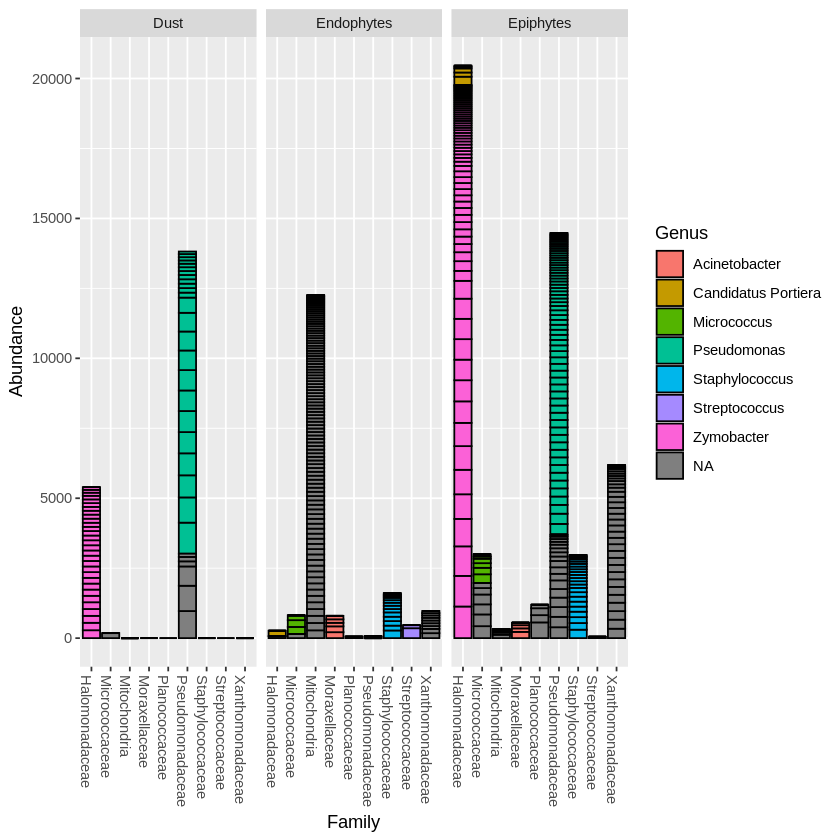

In [72]:
plot_bar(ps2, "Family", fill="Genus", facet_grid=~Source)


In [19]:
library("DESeq2")
library("vegan")


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply

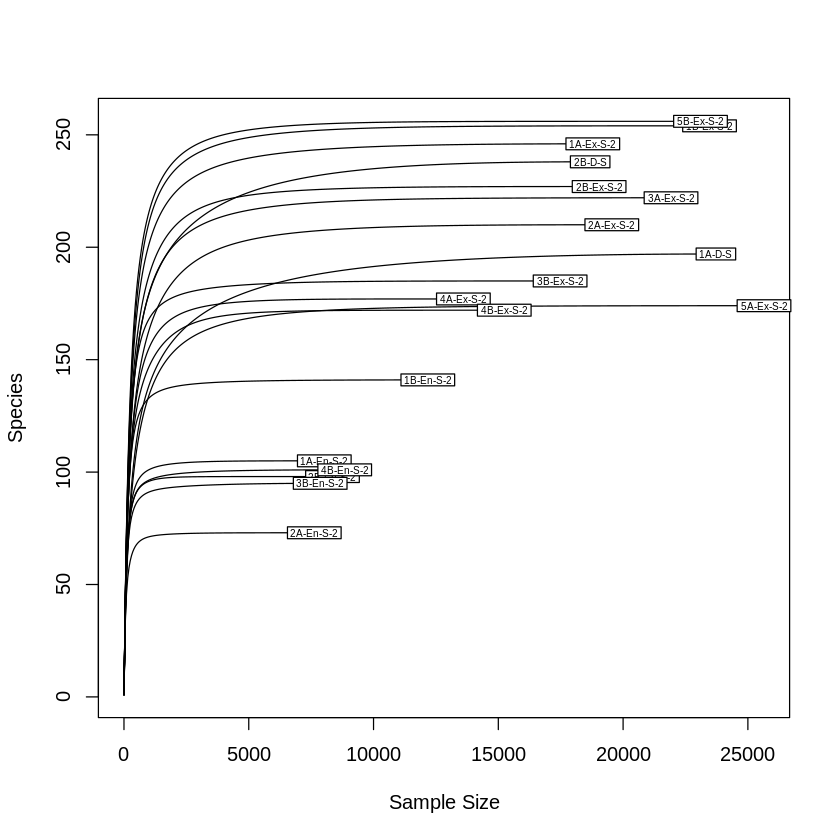

In [20]:
rarecurve(t(otu_table(ps1)), step=50, cex=0.5)

In [21]:
ps.rarefied = rarefy_even_depth(ps1, rngseed=1)

`set.seed(1)` was used to initialize repeatable random subsampling.

Please record this for your records so others can reproduce.

Try `set.seed(1); .Random.seed` for the full vector

...

419OTUs were removed because they are no longer 
present in any sample after random subsampling


...

